In [98]:
%load_ext autoreload
%autoreload 2

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
import sys

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.grid import Iso2DGaussianGridder, Norm_Iso2DGaussianGridder, DoG_Iso2DGaussianGridder
from utils.utils import create_dm_from_screenshots, roi_mask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#import subject from freesurfer to pycortex database
#this only works if line 335 in cortex.freesurfer.py is commented out (the extra fp.readline())
cortex.freesurfer.import_subj('sub-006', freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', 
                              whitematter_surf='smoothwm')

#create flatmaps with tksurfer, then run the folowing
#to be tested, to import flatmaps made with the procedure
#cortex.freesurfer.import_flat(subject, patch, hemis=['lh', 'rh'], sname=None,
#                flat_type='freesurfer',
#                freesurfer_subject_dir=None, clean=False)

In [111]:
subj='sub-006'

In [112]:
#transferring Wang 2015 atlas labels from fsaverage to subject
idx = {}
values = {}
for roi in ["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]:
    idx[roi], values[roi] = cortex.freesurfer.get_label(subject=subj,
                                              label='wang2015atlas.'+roi,
                                              fs_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer',
                                              src_subject=subj)
    

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V1v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V1v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V1d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V1d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V2v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V2v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang2015atlas.V2d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.wang2015atlas.V2d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.wang201

In [101]:


#nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
nonzerovar_mask = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/'+subj+'_nonzerovar-mask_space-fsnative.npy')

ds_rois = {}
data = np.zeros(nonzerovar_mask.shape[0])
for i, roi in enumerate(["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]):
    
    roi_data = np.zeros(nonzerovar_mask.shape[0])
    roi_data[idx[roi]] = 1
    data[idx[roi]] = i+1
    ds_rois[roi] = cortex.Vertex2D(roi_data, roi_data.astype('bool'), subj, cmap='RdBu_r_alpha').raw
    
    #need flattened brain to do this
    #cortex.add_roi(ds_rois[roi], name=roi, open_inkscape=False, add_path=True)

In [468]:
ds_rois['Wang2015Atlas'] = cortex.Vertex2D(data, data.astype('bool'), subj, cmap='Retinotopy_HSV_alpha').raw
cortex.webgl.show(ds_rois,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 31695


<JS: window.viewer>

In [102]:
V1=np.concatenate((idx['V1v'],idx['V1d']))
V2=np.concatenate((idx['V2v'],idx['V2d']))
V3=np.concatenate((idx['V3v'],idx['V3d']))

In [2]:
#load data sub 001

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
#norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")
norm_powell=np.load("/Users/marcoaqil/PRFMapping/Cartesius results sub-001/sub-001_iterparams-norm_space-fsaverage_powell.npy")
norm_num_fix = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_num_bounds_fixed.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")

norm_res = norm_num_fix

In [59]:
#load data sub 001
gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

In [103]:
#load data sub 007
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-norm_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_nonzerovar-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_timecourse_space-fsnative.npy')

In [122]:
#load data sub 006
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative.npy")
#nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonzerovar-mask_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow_var_mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

In [425]:
#MISSING THE MIDDLE PART
norm_res_what = np.concatenate((norm_res_3,norm_res_1,norm_res_2),axis=0)

In [395]:
norm_res_1 = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative.npy')
norm_res_2 = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative20191029094558.npy')
norm_res_3 = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative20191029094458.npy')

In [427]:
np.array_equal(norm_res_1,norm_res_2)

True

In [432]:
(norm_res_3[:,-1]-norm_grid_1[:,-1]).sum()

8474.1684817018

In [449]:
((norm_res[:,-1]-css_res[:,-1])[(norm_res[:,-1]-css_res[:,-1])<0]).mean()

-0.0037489687915105326

In [109]:
#correcting for low variance TCs (below 0.25% signal change)
tc_mean = timecourse.mean(-1)
low_var = (timecourse - tc_mean[...,np.newaxis]).max(-1) < tc_mean*0.25/100

gauss[low_var]=0
css_res[low_var]=0
dog_res[low_var]=0
norm_res[low_var]=0

In [123]:
#plotting histograms of mean signal intensity per ROI
tc_var_full = np.zeros(nonzerovar_mask.shape)
tc_var_full[nonzerovar_mask]=timecourse.var(-1)
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_var_full[idx[roi]],bins=100)
    pl.show()
    pl.close()

ValueError: NumPy boolean array indexing assignment cannot assign 583603 input values to the 550781 output values where the mask is true

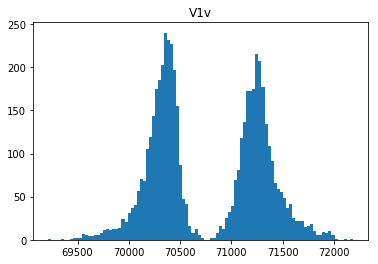

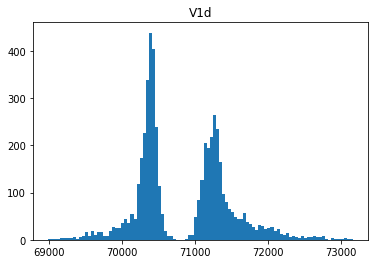

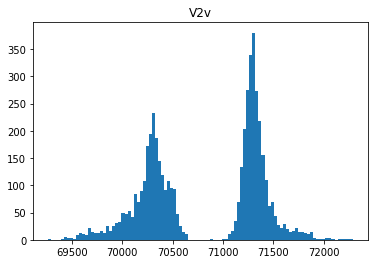

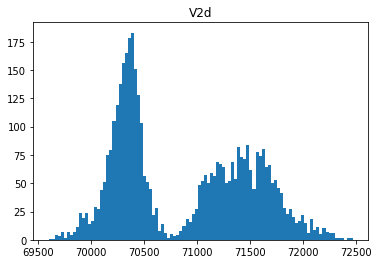

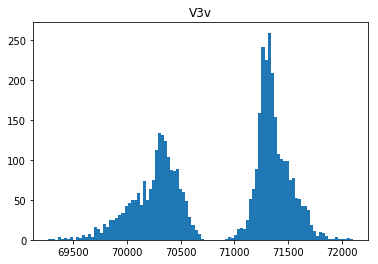

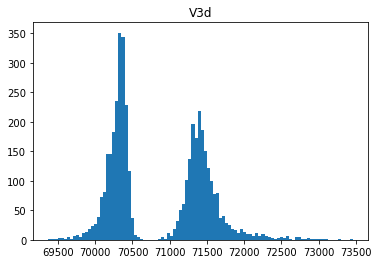

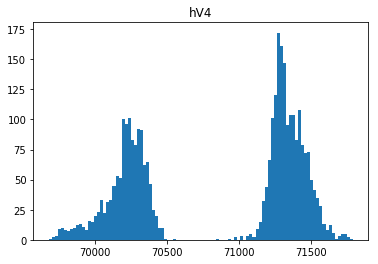

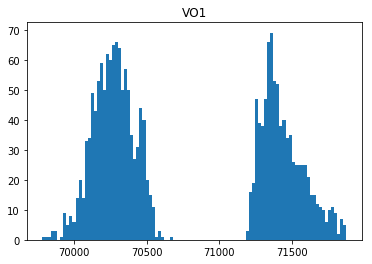

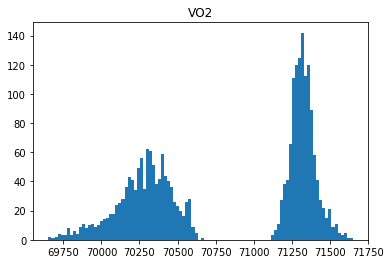

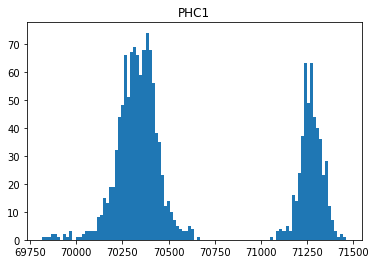

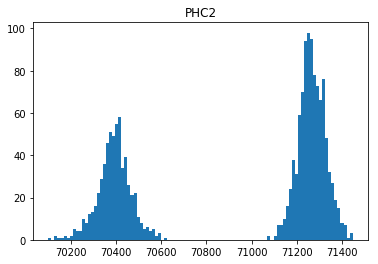

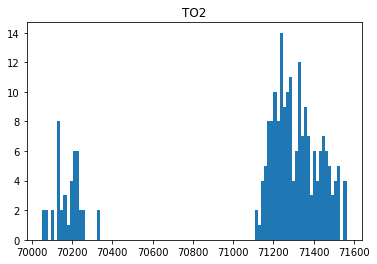

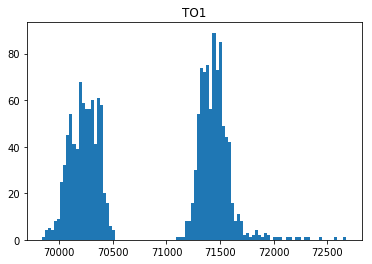

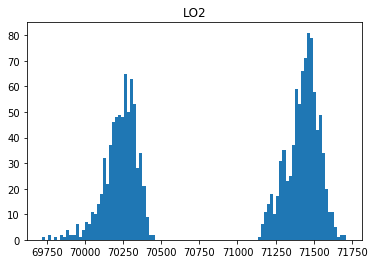

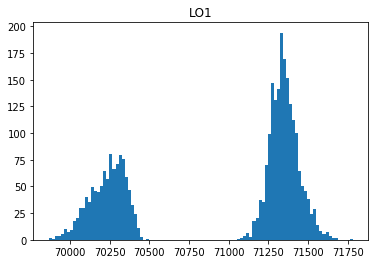

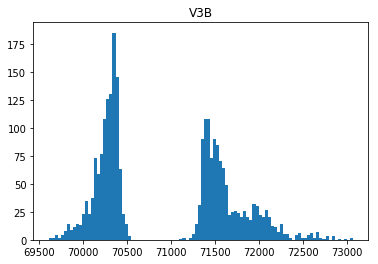

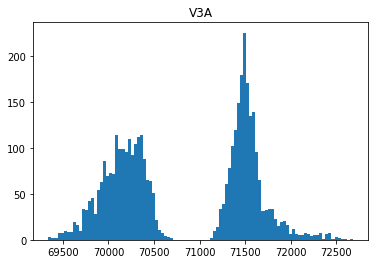

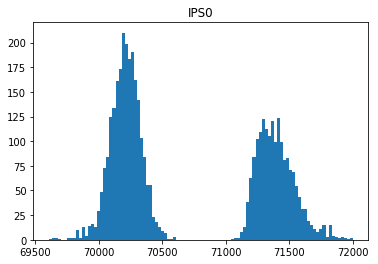

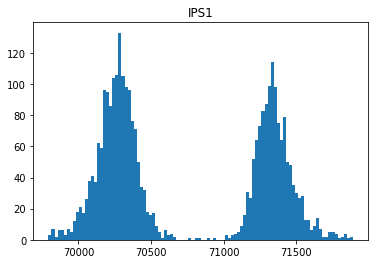

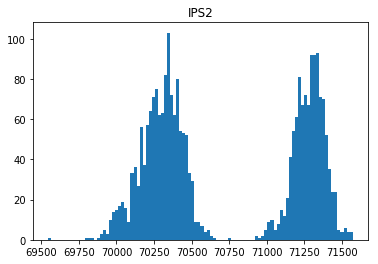

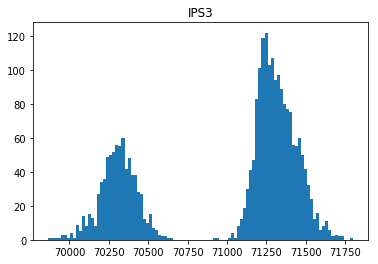

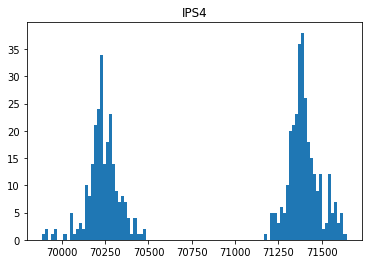

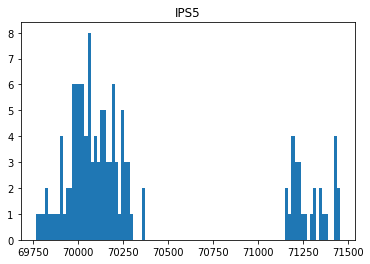

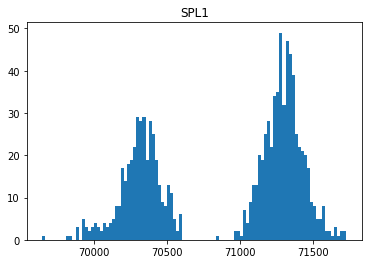

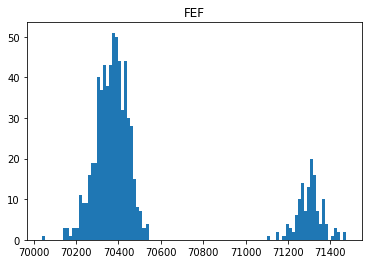

In [119]:
#plotting histograms of mean signal intensity per ROI
tc_mean_full = np.zeros(nonzerovar_mask.shape)
tc_mean = timecourse.mean(-1)
tc_mean_full[nonzerovar_mask]=tc_mean
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_mean_full[idx[roi]],bins=100)
    pl.show()
    pl.close()

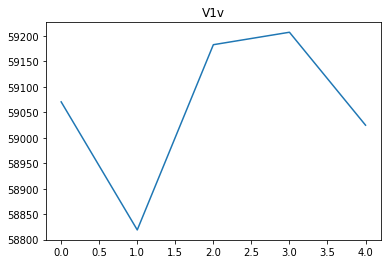

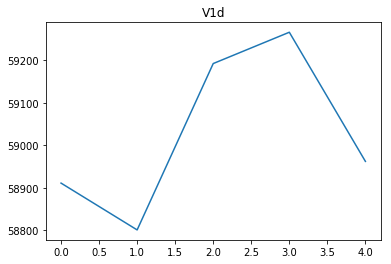

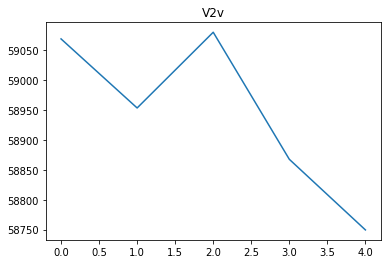

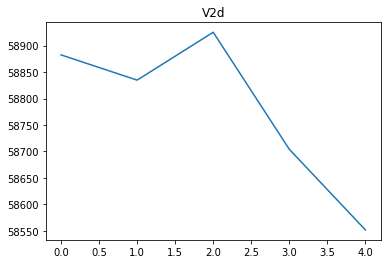

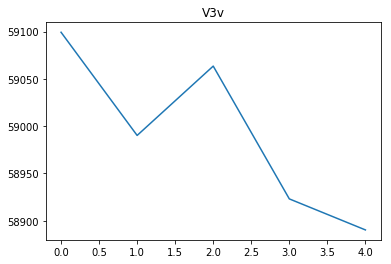

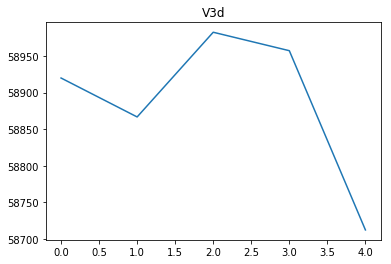

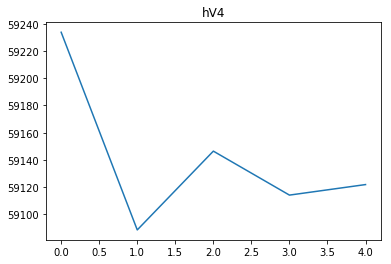

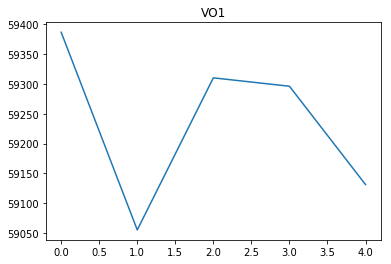

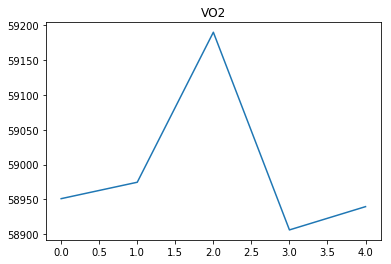

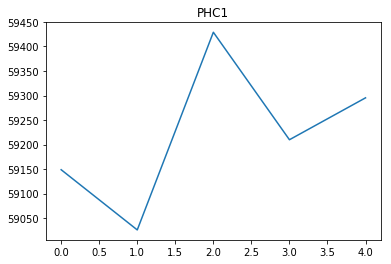

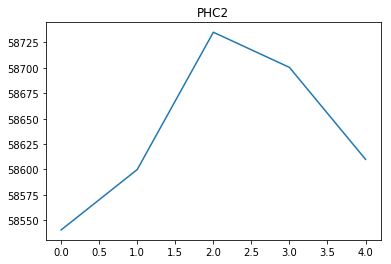

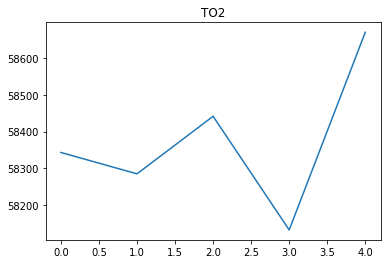

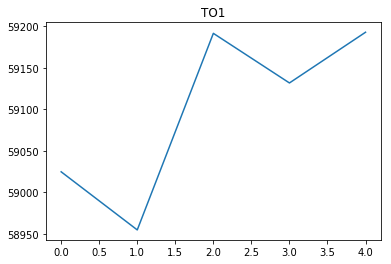

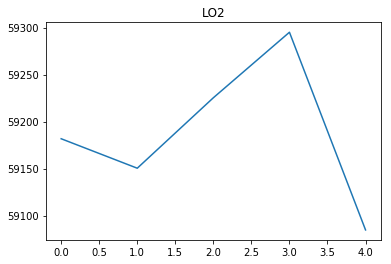

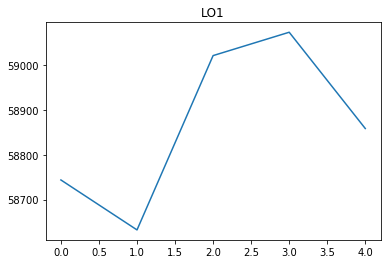

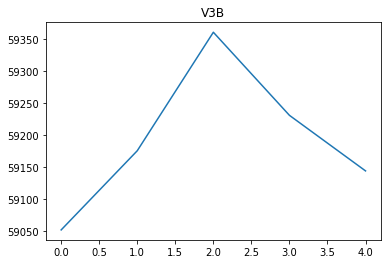

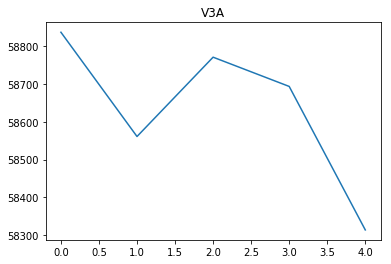

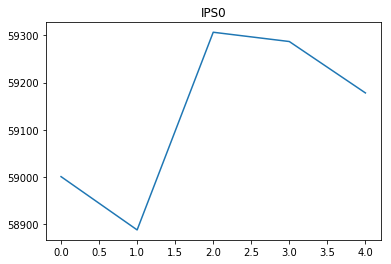

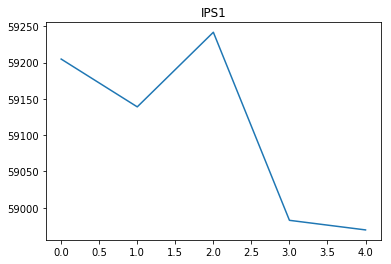

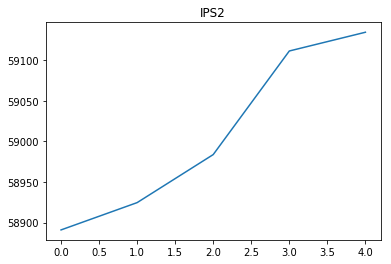

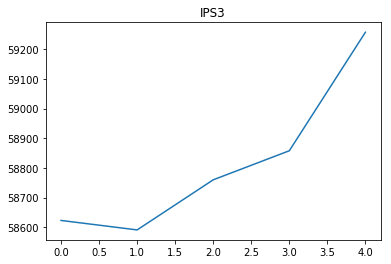

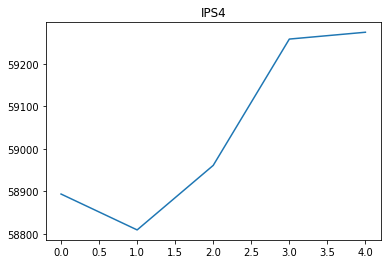

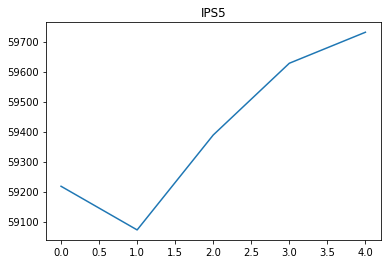

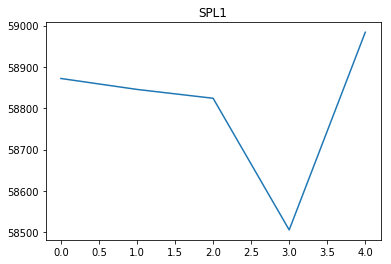

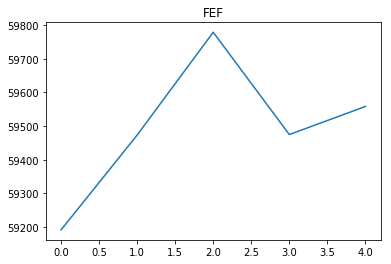

In [96]:
#plotting timeseries
#tc_full = np.zeros((nonzerovar_mask.shape[0],1180))
#tc_full[nonzerovar_mask]=timecourse
#del timecourse
for roi in idx:
    pl.figure()
    pl.title(roi)
    pl.plot(tc_full[idx[roi],-5:].mean(0))
    pl.show()
    pl.close()

In [121]:
mean_ts_vert = cortex.Vertex(tc_mean_full, subject='sub-006')

cortex.webgl.show(mean_ts_vert,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 16520


<JS: window.viewer>

Stopping server


In [472]:
#RSQ
rsq = np.zeros((nonzerovar_mask.shape[0],4))
rsq[nonzerovar_mask,0] = gauss[:,-1]
rsq[nonzerovar_mask,1] = css_res[:, -1]
rsq[nonzerovar_mask,2] = dog_res[:, -1]
rsq[nonzerovar_mask,3] = norm_res[:, -1]


#prf ecc
ecc = np.zeros((nonzerovar_mask.shape[0],4))
ecc[nonzerovar_mask,0] = np.sqrt(gauss[:,0]**2+gauss[:,1]**2)
ecc[nonzerovar_mask,1] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc[nonzerovar_mask,2] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc[nonzerovar_mask,3] = np.sqrt(norm_res[:,0]**2+norm_res[:,1]**2)

#prf polar angle
polar = np.zeros((nonzerovar_mask.shape[0],4))
polar[nonzerovar_mask,0] = np.arctan2(gauss[:,1], gauss[:,0])
polar[nonzerovar_mask,1] = np.arctan2(css_res[:,1], css_res[:,0])
polar[nonzerovar_mask,2] = np.arctan2(dog_res[:,1], dog_res[:,0])
polar[nonzerovar_mask,3] = np.arctan2(norm_res[:,1], norm_res[:,0])

#prf size
size = np.zeros((nonzerovar_mask.shape[0],4))
size[nonzerovar_mask,0] = gauss[:,2]
size[nonzerovar_mask,1] = css_res[:,2]
size[nonzerovar_mask,2] = dog_res[:,2]
size[nonzerovar_mask,3] = norm_res[:,2]

#prf amplitude
amp = np.zeros((nonzerovar_mask.shape[0],4))
amp[nonzerovar_mask,0] = gauss[:,3]
amp[nonzerovar_mask,1] = css_res[:,3]
amp[nonzerovar_mask,2] = dog_res[:,3]
amp[nonzerovar_mask,3] = norm_res[:,3]

#BOLD baseline
bold_base = np.zeros((nonzerovar_mask.shape[0],4))
bold_base[nonzerovar_mask,0] = gauss[:,4]
bold_base[nonzerovar_mask,1] = css_res[:,4]
bold_base[nonzerovar_mask,2] = dog_res[:,4]
bold_base[nonzerovar_mask,3] = norm_res[:,4]

#other parameters plot on cortex

#css exponent
css_exp = np.zeros(nonzerovar_mask.shape[0])
css_exp[nonzerovar_mask] = css_res[:,5]

#surround amplitude
surr_amp = np.zeros((nonzerovar_mask.shape[0],2))
surr_amp[nonzerovar_mask,0] = dog_res[:,5]
surr_amp[nonzerovar_mask,1] = norm_res[:,5]

#surround size
surr_size = np.zeros((nonzerovar_mask.shape[0],2))
surr_size[nonzerovar_mask,0] = dog_res[:,6]
surr_size[nonzerovar_mask,1] = norm_res[:,6]

#suppression index (for norm also take into account baseline)
suppr_idx = np.zeros((nonzerovar_mask.shape[0],2))
suppr_idx[nonzerovar_mask,0] = (dog_res[:,5] * dog_res[:,6]**2)/(dog_res[:,3] * dog_res[:,2]**2)
suppr_idx[nonzerovar_mask,1] = (norm_res[:,5] * norm_res[:,6]**2 + norm_res[:,7])/(norm_res[:,3] * norm_res[:,2]**2 + norm_res[:,8])

#DOG width at minimum
dog_fwm = np.zeros(nonzerovar_mask.shape[0])
dog_fwm[nonzerovar_mask] = 2*np.sqrt(np.log((dog_res[:,5]*dog_res[:,2]**2)/(dog_res[:,3]* dog_res[:,6]**2))*(2*dog_res[:,2]**2*dog_res[:,6]**2)/(dog_res[:,2]**2-dog_res[:,6]**2))

#DOG width at zero
dog_fwz = np.zeros(nonzerovar_mask.shape[0])
dog_fwz[nonzerovar_mask] = 2*np.sqrt(2)*dog_res[:,2]*dog_res[:,6]*np.sqrt(-np.log(dog_res[:,2]/dog_res[:,5])/((dog_res[:,2]+dog_res[:,6])*(dog_res[:,2]-dog_res[:,6])))

#normalization model baselines (neural and surround)
baselines = np.zeros((nonzerovar_mask.shape[0],2))
baselines[nonzerovar_mask,0] = norm_res[:,7]
baselines[nonzerovar_mask,1] = norm_res[:,8]


/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel

In [474]:
alpha = rsq.mean(-1) * (ecc.mean(-1)<5)
alpha_gauss = rsq[:,0] * (ecc[:,0]<5)
alpha_css = rsq[:,1] * (ecc[:,1]<5)
alpha_dog = rsq[:,2] * (ecc[:,2]<5)
alpha_norm = rsq[:,3] * (ecc[:,3]<5)

In [97]:
#if at least
alpha = rsq.max(-1) * (ecc.max(-1)<5)

NameError: name 'rsq' is not defined

In [481]:
#use e.g. roi_mask(V1,alpha) or roi_mask(idx["FEF"],alpha) as dim2 to plot only for specific ROIs

rsq_diff_cssgauss = cortex.Vertex2D(rsq[:,1]-rsq[:,0], alpha, subject=subj,
                                              vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_doggauss = cortex.Vertex2D(rsq[:,2]-rsq[:,0], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normgauss = cortex.Vertex2D(rsq[:,3]-rsq[:,0], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normdog = cortex.Vertex2D(rsq[:,3]-rsq[:,2], alpha, subject=subj,
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

rsq_diff_normcss = cortex.Vertex2D(rsq[:,3]-rsq[:,1], alpha, subject=subj, 
                                          vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

#NOTE: MULTIPLE VERTEX2D IN ONE DATASET = BUGGY
ds_rsq = {'CSS - Gauss':rsq_diff_cssgauss.raw, 'DoG -  Gauss':rsq_diff_doggauss.raw, 'Norm - Gauss':rsq_diff_normgauss.raw,
    'Norm - DoG':rsq_diff_normdog.raw, 'Norm - CSS':rsq_diff_normcss.raw}

cortex.webgl.show(ds_rsq,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True,
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 54609


<JS: window.viewer>

Stopping server


In [482]:
#plot ecc on cortex
ecc_gauss = cortex.Vertex2D(ecc[:,0], alpha_gauss, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_css = cortex.Vertex2D(ecc[:,1], alpha_css, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_dog = cortex.Vertex2D(ecc[:,2], alpha_dog, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
ecc_norm = cortex.Vertex2D(ecc[:,3], alpha_norm, subject=subj, vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_ecc = {'Ecc Gauss':ecc_gauss.raw, 'Ecc CSS':ecc_css.raw, 'Ecc DoG':ecc_dog.raw, 'Ecc Norm':ecc_norm.raw}

cortex.webgl.show(ds_ecc,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 52180


<JS: window.viewer>

Stopping server


In [483]:
#plot polar angle on cortex
polar_gauss = cortex.Vertex2D(polar[:,0], alpha_gauss, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_css = cortex.Vertex2D(polar[:,1], alpha_css, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_dog = cortex.Vertex2D(polar[:,2], alpha_dog, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')
polar_norm = cortex.Vertex2D(polar[:,3], alpha_norm, subject=subj, vmin2=0.2, vmax2=0.6, cmap='Retinotopy_HSV_2x_alpha')


ds_polar = {'polar Gauss':polar_gauss.raw, 'polar CSS':polar_css.raw, 'polar DoG':polar_dog.raw, 'polar Norm':polar_norm.raw}

cortex.webgl.show(ds_polar,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 6632


<JS: window.viewer>

Stopping server


In [484]:
#plot size on cortex
size_gauss = cortex.Vertex2D(size[:,0], alpha_gauss, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_css = cortex.Vertex2D(size[:,1], alpha_css, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_dog = cortex.Vertex2D(size[:,2], alpha_dog, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
size_norm = cortex.Vertex2D(size[:,3], alpha_norm, subject=subj, vmin=0, vmax=3, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_size = {'size Gauss':size_gauss.raw, 'size CSS':size_css.raw, 'size DoG':size_dog.raw, 'size Norm':size_norm.raw}

cortex.webgl.show(ds_size,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 16811


<JS: window.viewer>

Stopping server


In [499]:
#plot amp on cortex
amp_gauss = cortex.Vertex2D(amp[:,0], alpha_gauss, subject=subj, vmin=0, vmax=0.01, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_css = cortex.Vertex2D(amp[:,1], alpha_css, subject=subj, vmin=0, vmax=0.01, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_dog = cortex.Vertex2D(amp[:,2], alpha_dog, subject=subj, vmin=0, vmax=0.01, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
amp_norm = cortex.Vertex2D(amp[:,3], alpha_norm, subject=subj, vmin=0, vmax=0.01, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_amp = {'amp Gauss':amp_gauss.raw, 'amp CSS':amp_css.raw, 'amp DoG':amp_dog.raw, 'amp Norm':amp_norm.raw}

cortex.webgl.show(ds_amp,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 56825


<JS: window.viewer>

Stopping server


In [485]:
#CSS exponent
ds_css_exp = {'CSS Exponent':cortex.Vertex2D(css_exp, alpha_css, subject=subj,
                                             vmin=0, vmax=0.75, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha').raw}

cortex.webgl.show(ds_css_exp,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)


Started server on port 52028


<JS: window.viewer>

Stopping server


In [296]:
#plot surr_size on cortex
surr_size_dog = cortex.Vertex2D(surr_size[:,0], alpha_dog, subject=subj,
                                vmax=50, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
surr_size_norm = cortex.Vertex2D(surr_size[:,1], alpha_norm, subject=subj,
                                  vmax=50, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_surr_size = {'surr_size DoG':surr_size_dog.raw, 'surr_size Norm':surr_size_norm.raw}

cortex.webgl.show(ds_surr_size,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 12386


<JS: window.viewer>

Stopping server


In [486]:
#dog fwmin, fwzero
fwm_dog = cortex.Vertex2D(dog_fwm, alpha_dog, subject=subj,
                                vmin=1, vmax=20, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
fwz_dog = cortex.Vertex2D(dog_fwz, alpha_dog, subject=subj,
                                 vmin=0, vmax=5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

dog_measures = {'DoG full width at min':fwm_dog.raw, ' DoG full width at zero':fwz_dog.raw}

cortex.webgl.show(dog_measures,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 56115


<JS: window.viewer>

Stopping server


In [299]:
#plot suppr idx on cortex (not very meaningful)
suppr_idx_dog = cortex.Vertex2D(suppr_idx[:,0], alpha_dog, subject=subj,
                                vmin=0.1, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
suppr_idx_norm = cortex.Vertex2D(suppr_idx[:,1], alpha_norm, subject=subj,
                                 vmin=0, vmax=0.1, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_suppr_idx = {'suppr_idx DoG':suppr_idx_dog.raw, 'suppr_idx Norm':suppr_idx_norm.raw}

cortex.webgl.show(ds_suppr_idx,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

Started server on port 61109


<JS: window.viewer>

Stopping server


In [300]:
#norm baselines
neural_baseline = cortex.Vertex2D(baselines[:,0], alpha_norm, subject=subj,
                                vmin=-1.5, vmax=1.5, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
surr_baseline = cortex.Vertex2D(baselines[:,1], alpha_norm, subject=subj,
                                 vmin=1, vmax=100, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_baselines = {'Neural baseline':neural_baseline.raw, 'Surround baseline':surr_baseline.raw}

def attempt(voxel, vertex):
    print(str(vertex))

cortex.webgl.show(ds_baselines,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True,
                 pickerfun=attempt)

Started server on port 55373


<JS: window.viewer>

Stopping server


<IPython.core.display.Javascript object>


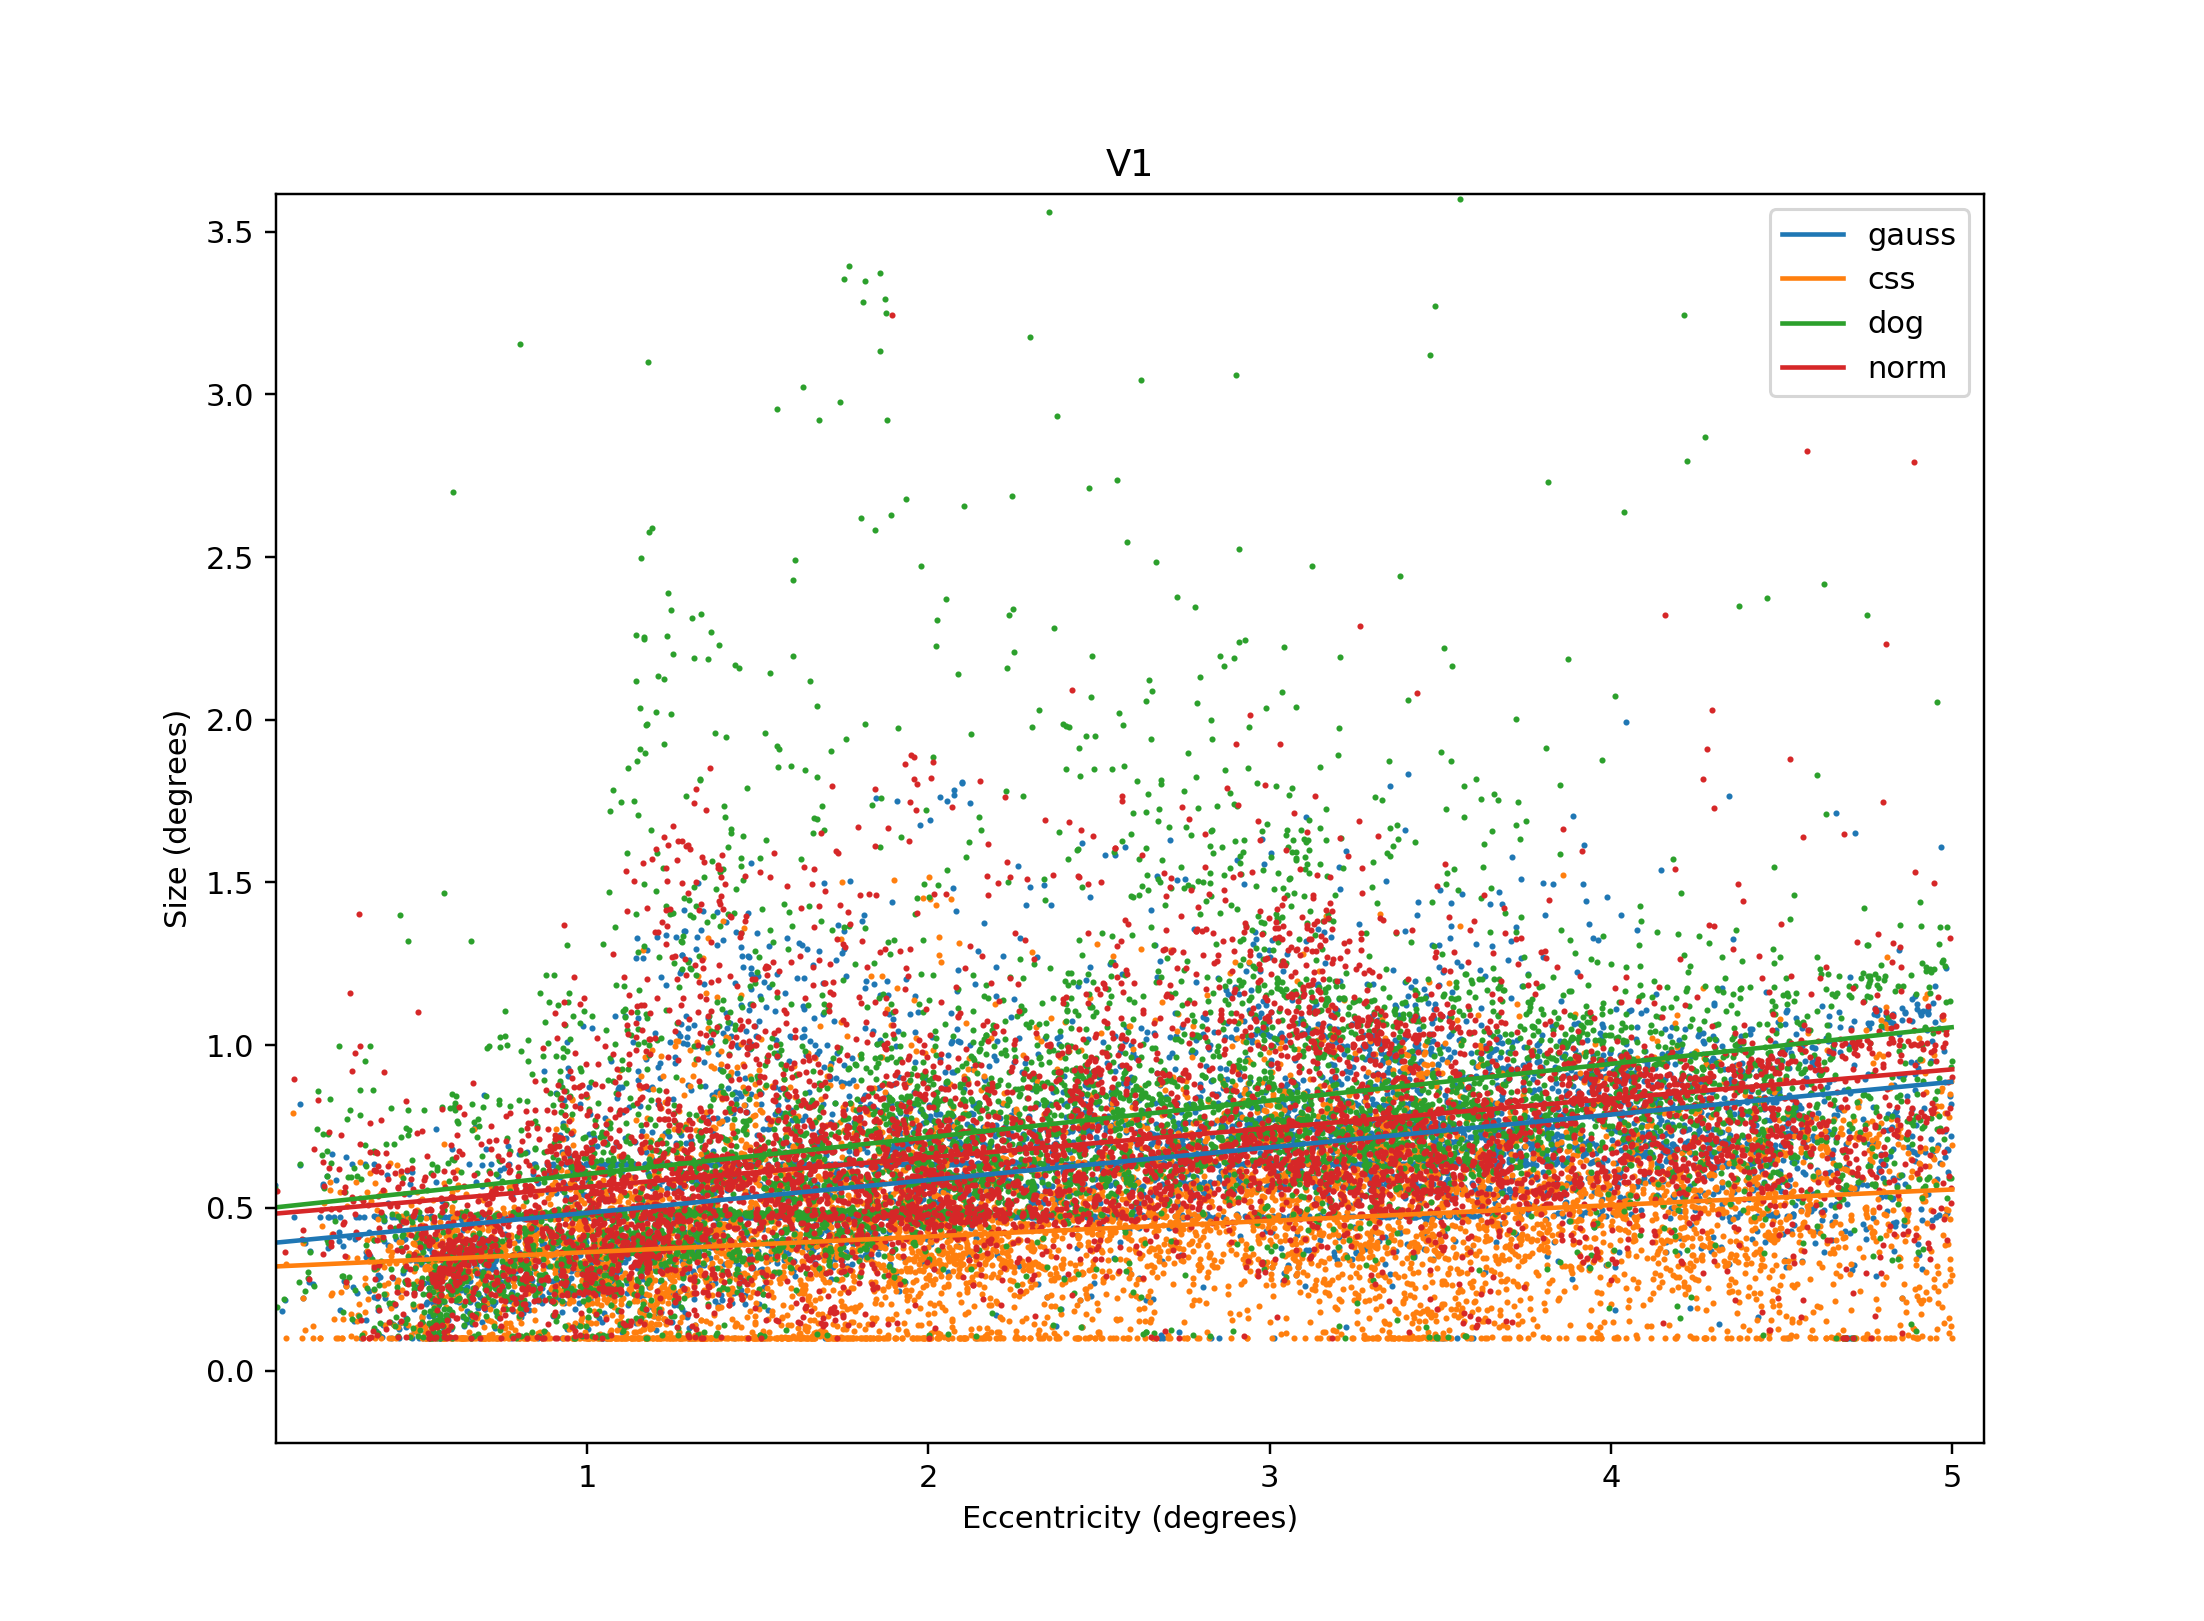

<IPython.core.display.Javascript object>


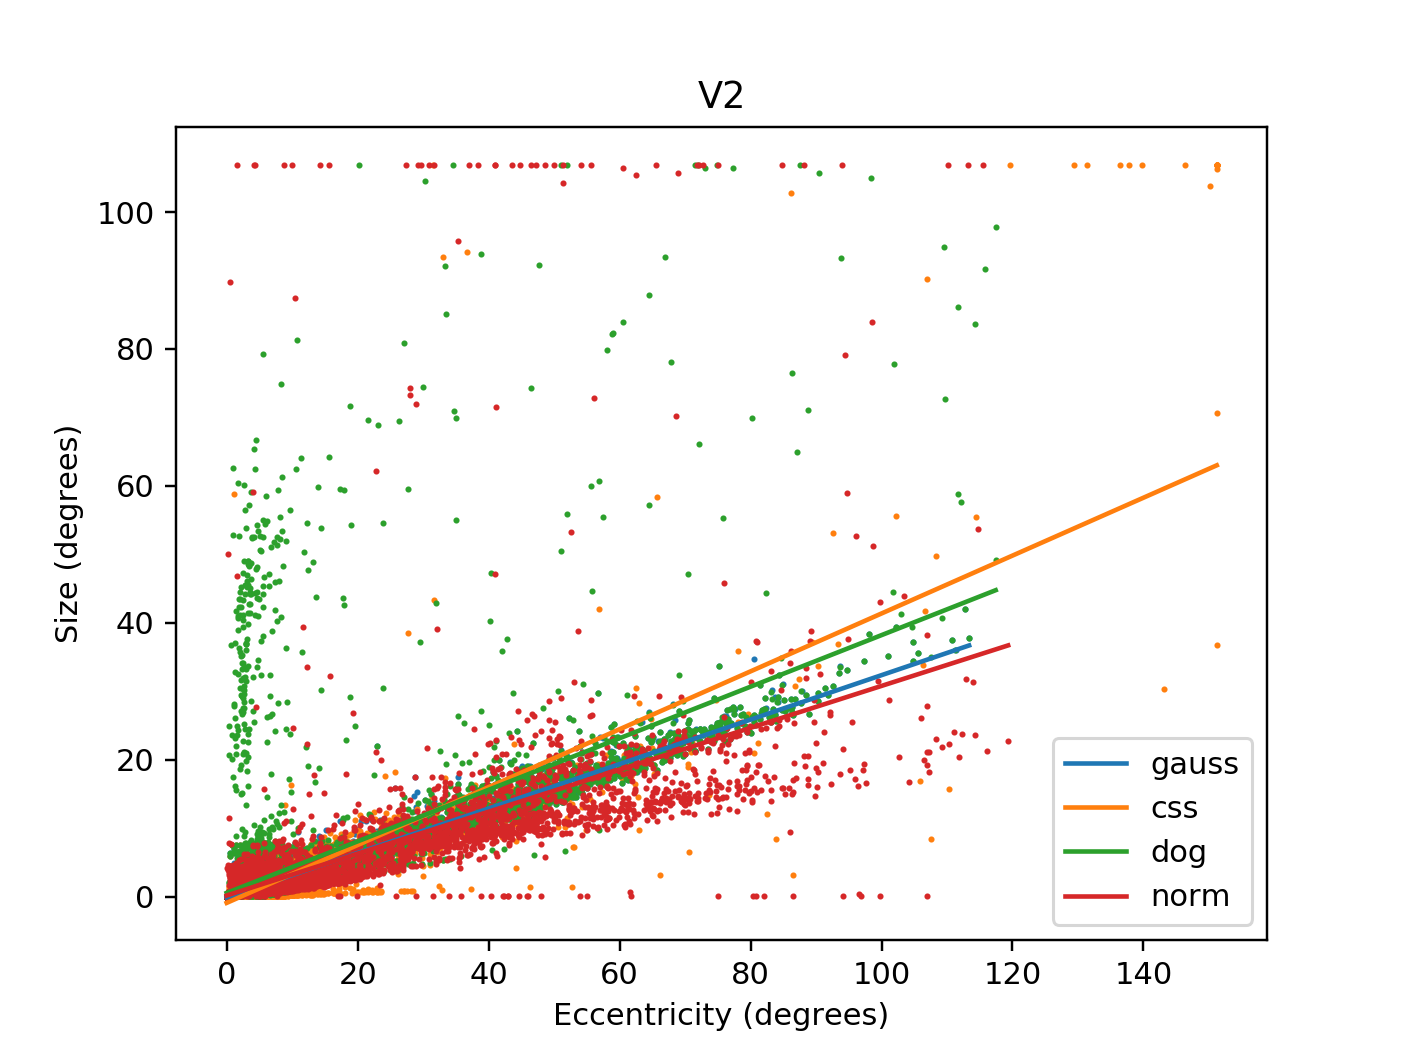

<IPython.core.display.Javascript object>


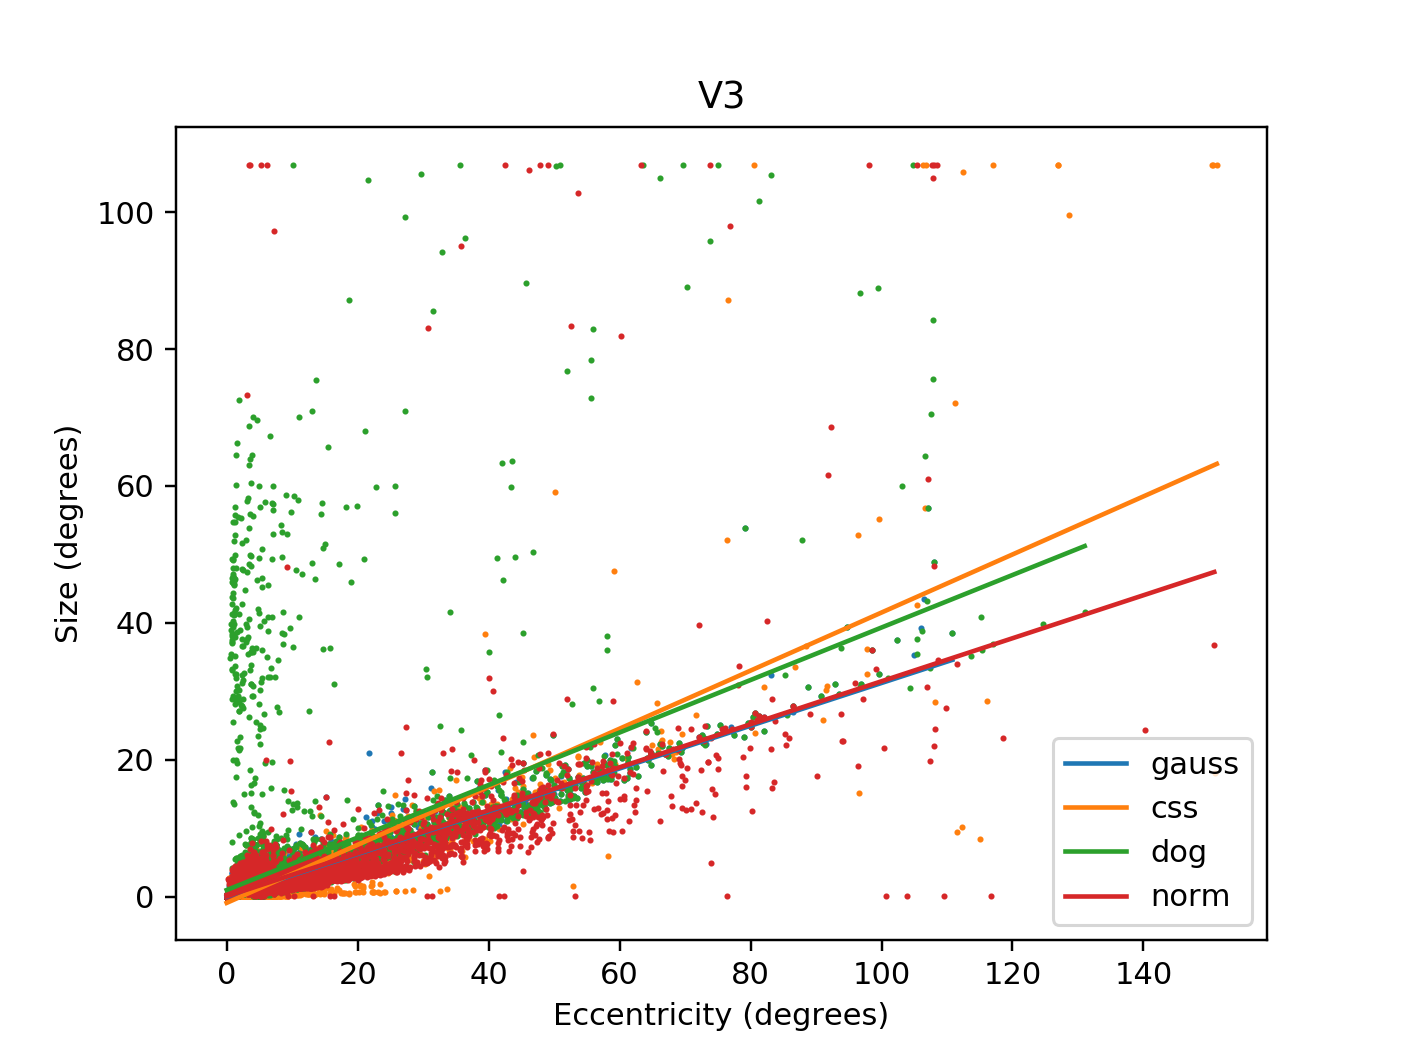

In [487]:
%matplotlib notebook
#use e.g. roi_mask(V1,alpha_gauss).astype('bool') instead of just V1 to implement same alpha masking as cortex plots
pl.figure()
pl.title("V1")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")


pl.scatter(ecc_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], size_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], s=1)
pl.scatter(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], size_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], s=1)
pl.scatter(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], size_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], s=1)
pl.scatter(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], size_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], s=1)
pl.plot(np.unique(ecc_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], size_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')], 1))(np.unique(ecc_gauss.dim1.data[roi_mask(V1,alpha_gauss*(amp[:,0]>0)).astype('bool')])), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], size_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')], 1))(np.unique(ecc_css.dim1.data[roi_mask(V1,alpha_css*(amp[:,1]>0)).astype('bool')])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], size_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')], 1))(np.unique(ecc_dog.dim1.data[roi_mask(V1,alpha_dog*(amp[:,2]>0)).astype('bool')])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')]), np.poly1d(np.polyfit(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], size_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')], 1))(np.unique(ecc_norm.dim1.data[roi_mask(V1,alpha_norm*(amp[:,3]>0)).astype('bool')])), label='norm')
pl.legend()
pl.figure()
pl.title("V2")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")
pl.scatter(ecc_gauss.dim1.data[V2], size_gauss.dim1.data[V2], s=1)
pl.scatter(ecc_css.dim1.data[V2], size_css.dim1.data[V2], s=1)
pl.scatter(ecc_dog.dim1.data[V2], size_dog.dim1.data[V2], s=1)
pl.scatter(ecc_norm.dim1.data[V2], size_norm.dim1.data[V2], s=1)
pl.plot(np.unique(ecc_gauss.dim1.data[V2]), np.poly1d(np.polyfit(ecc_gauss.dim1.data[V2], size_gauss.dim1.data[V2], 1))(np.unique(ecc_gauss.dim1.data[V2])), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[V2]), np.poly1d(np.polyfit(ecc_css.dim1.data[V2], size_css.dim1.data[V2], 1))(np.unique(ecc_css.dim1.data[V2])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[V2]), np.poly1d(np.polyfit(ecc_dog.dim1.data[V2], size_dog.dim1.data[V2], 1))(np.unique(ecc_dog.dim1.data[V2])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[V2]), np.poly1d(np.polyfit(ecc_norm.dim1.data[V2], size_norm.dim1.data[V2], 1))(np.unique(ecc_norm.dim1.data[V2])), label='norm')
pl.legend()
pl.figure()
pl.title("V3")
pl.xlabel("Eccentricity (degrees)")
pl.ylabel("Size (degrees)")
pl.scatter(ecc_gauss.dim1.data[V3], size_gauss.dim1.data[V3], s=1)
pl.scatter(ecc_css.dim1.data[V3], size_css.dim1.data[V3], s=1)
pl.scatter(ecc_dog.dim1.data[V3], size_dog.dim1.data[V3], s=1)
pl.scatter(ecc_norm.dim1.data[V3], size_norm.dim1.data[V3], s=1)
pl.plot(np.unique(ecc_gauss.dim1.data[V3]), np.poly1d(np.polyfit(ecc_gauss.dim1.data[V3], size_gauss.dim1.data[V3], 1))(np.unique(ecc_gauss.dim1.data[V3])), label='gauss')
pl.plot(np.unique(ecc_css.dim1.data[V3]), np.poly1d(np.polyfit(ecc_css.dim1.data[V3], size_css.dim1.data[V3], 1))(np.unique(ecc_css.dim1.data[V3])), label='css')
pl.plot(np.unique(ecc_dog.dim1.data[V3]), np.poly1d(np.polyfit(ecc_dog.dim1.data[V3], size_dog.dim1.data[V3], 1))(np.unique(ecc_dog.dim1.data[V3])), label='dog')
pl.plot(np.unique(ecc_norm.dim1.data[V3]), np.poly1d(np.polyfit(ecc_norm.dim1.data[V3], size_norm.dim1.data[V3], 1))(np.unique(ecc_norm.dim1.data[V3])), label='norm')
pl.legend()

<IPython.core.display.Javascript object>


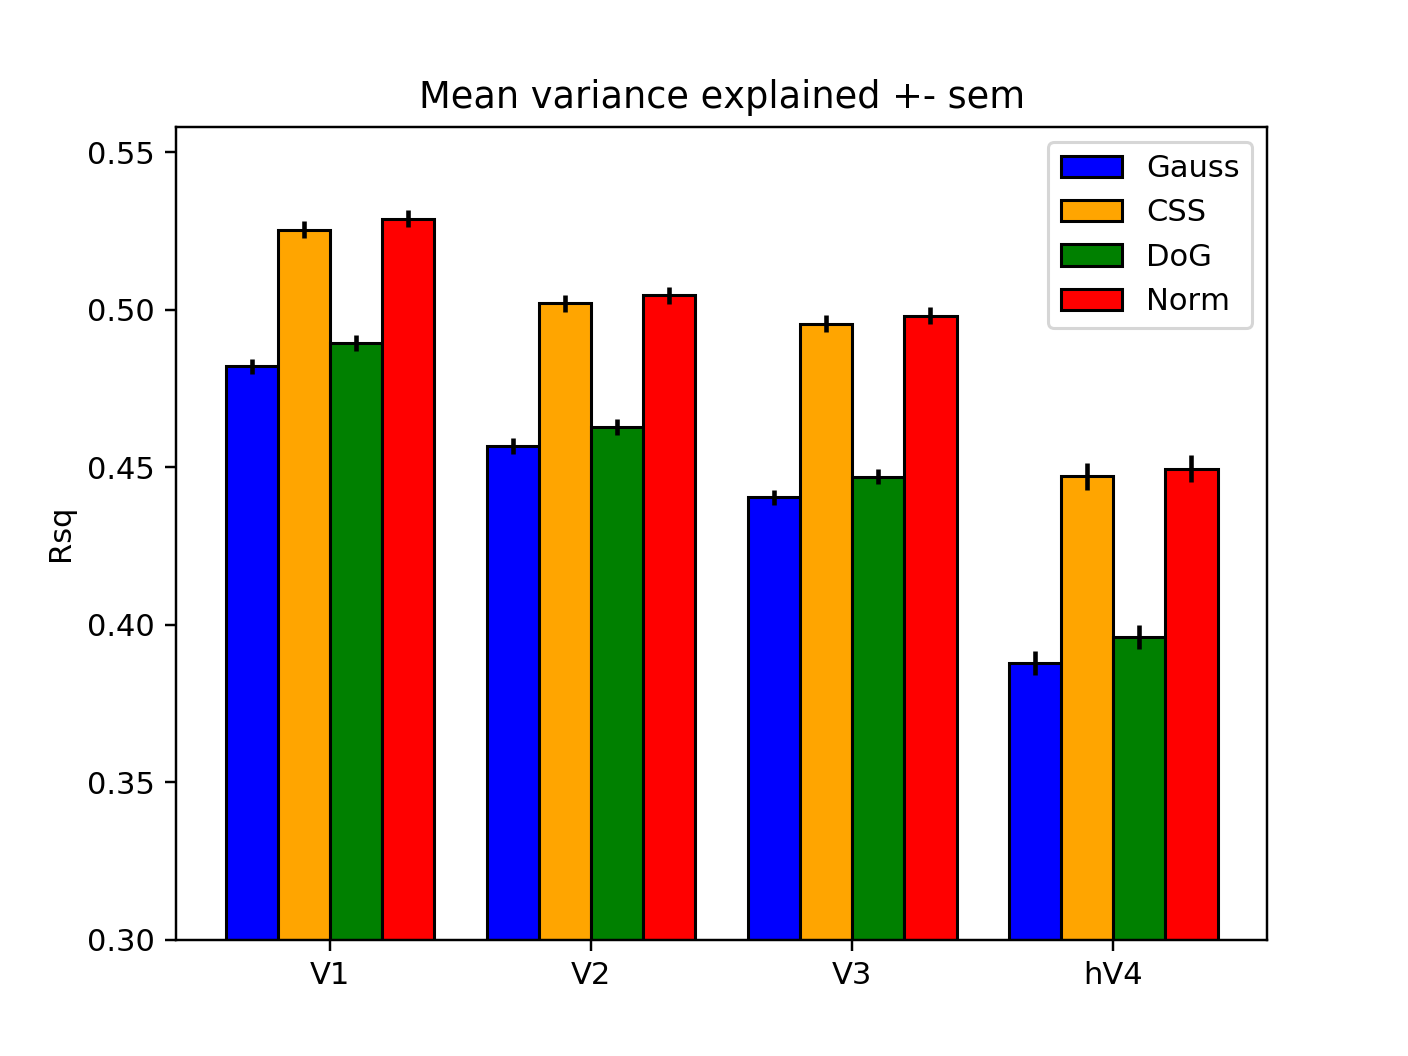

In [302]:
from scipy.stats import sem, ks_2samp
["V1v", "V1d", "V2v", "V2d", "V3v", "V3d", "hV4", "VO1", "VO2", "PHC1", "PHC2",
    "TO2", "TO1", "LO2", "LO1", "V3B", "V3A", "IPS0", "IPS1", "IPS2", "IPS3", "IPS4", 
    "IPS5", "SPL1", "FEF"]
pl.figure()
pl.title("Mean variance explained +- sem")
pl.ylabel("Rsq")
p1=pl.bar([0,0.1,0.2,0.3], height=np.mean(rsq[roi_mask(V1,alpha).astype('bool')],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V1,alpha).astype('bool')],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([0.5,0.6,0.7,0.8], height=np.mean(rsq[roi_mask(V2,alpha).astype('bool')],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V2,alpha).astype('bool')],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([1,1.1,1.2,1.3], height=np.mean(rsq[roi_mask(V3,alpha).astype('bool')],axis=0), width=0.1, yerr=sem(rsq[roi_mask(V3,alpha).astype('bool')],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.bar([1.5,1.6,1.7,1.8], height=np.mean(rsq[roi_mask(idx['hV4'],alpha).astype('bool')],axis=0), width=0.1,yerr=sem(rsq[roi_mask(idx['hV4'],alpha).astype('bool')],axis=0), color=
      ['blue','orange','green','red'],edgecolor='black')

pl.xticks([0.15, 0.65, 1.15, 1.65], ['V1','V2', 'V3', 'hV4'])

pl.ylim(bottom=0.3)
pl.legend((p1[0],p1[1],p1[2],p1[3]),('Gauss','CSS','DoG','Norm'),loc=0)


In [304]:
print(ks_2samp(rsq[roi_mask(V1,alpha).astype('bool'),1],rsq[roi_mask(V1,alpha).astype('bool'),3]))


Ks_2sampResult(statistic=0.009221466364323506, pvalue=0.9402036755078752)


In [ ]:
######################################################################################

In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [ ]:
#create stim, load timecourse
timecourse=np.load("/Users/marcoaqil/PRFMapping/sub-001_timecourse_space-fsaverage.npy")

dm_list = []
for screenshot_path in screenshot_paths:
    # create stimulus
    dm_list.append(create_dm_from_screenshots(screenshot_path,
                                              n_pix)[..., discard_volumes:])

task_lengths = [dm.shape[-1] for dm in dm_list]
dm_full = np.concatenate(tuple(dm_list), axis=-1)

prf_stim = PRFStimulus2D(screen_size_cm=39.3,
                         screen_distance_cm=210,
                         design_matrix=dm_full,
                         TR=1.5)

In [ ]:
%matplotlib notebook
vox_num=50370
fig=pl.figure()
window_length=121
hrf=[1,1,0]

#initialize models (gg does both regular gaussian and CSS)
gg = Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=True,
                          window_length=window_length,
                          task_lengths=task_lengths)

gg_norm = Norm_Iso2DGaussianGridder(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=True,
                                    window_length=window_length,
                                    task_lengths=task_lengths)

gg_dog = DoG_Iso2DGaussianGridder(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=True,
                                  window_length=window_length,
                                  task_lengths=task_lengths)


#create timecourses
tc_vox=timecourse[vox_num]
norm_grid_tc=gg_norm.return_single_prediction(*list(norm_grid[vox_num,:-1]))
norm_iter_tc=gg_norm.return_single_prediction(*list(norm_num[vox_num,:-1]))
gauss_tc=gg.return_single_prediction(*list(gauss[vox_num,:-1]))

pl.plot(tc_vox)
pl.plot(norm_grid_tc)
pl.plot(norm_iter_tc)

print(1-np.sum((tc_vox-norm_grid_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-norm_iter_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-gauss_tc)**2)/(1180*np.var(tc_vox)))

print(norm_grid[vox_num])
print(norm_num[vox_num])